In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
from itertools import chain
from geopy.geocoders import Nominatim
from geotext import GeoText
%matplotlib inline

In [2]:
box_office = pd.read_csv("data/box-office.csv", delimiter=";")
box_office.fillna("0",inplace=True)
box_office["Average Budget"] = box_office["Average Budget"].str.replace("[$,]",'').astype(float) / 10**6
box_office["Box office"] = box_office["Box office"].str.replace("[$,]",'').astype(int) / 10**9
box_office["Movies"] = box_office["Movies"].str.replace(",",'').astype(int)
box_office["Year"] = box_office["Year"].astype(int)
box_office["Budget"] = box_office["Average Budget"] * box_office["Movies"] / 10**3

In [3]:
box_office.head(5)

,Year,Movies,Average Budget,Box office,Budget
0,2018,4387,57.715238,32.177315,253.196749
1,2017,3957,54.517823,37.658948,215.727026
2,2016,3663,42.323318,36.759761,155.030314
3,2015,3126,26.808427,35.988294,83.803143
4,2014,1632,30.252500,29.907642,49.372080


In [4]:
years = box_office["Year"].values
average_budget = box_office["Average Budget"].values
movies = box_office["Movies"].values
bo = box_office["Box office"].values
budget = box_office["Budget"].values

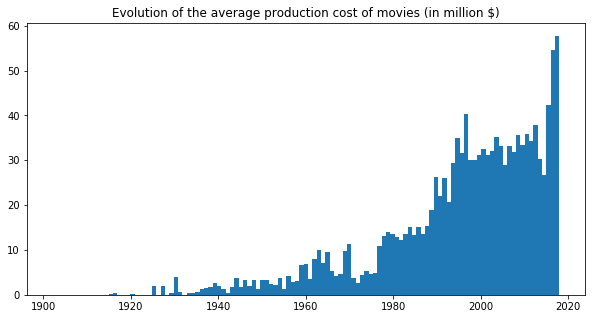

In [5]:
plt.figure(figsize=(10, 5))
plt.hist(years, weights=average_budget, bins=(years.max() - years.min()+1))
plt.title("Evolution of the average production cost of movies (in million $)")
plt.savefig('docs/img/average_production_costs.png', transparent=True)

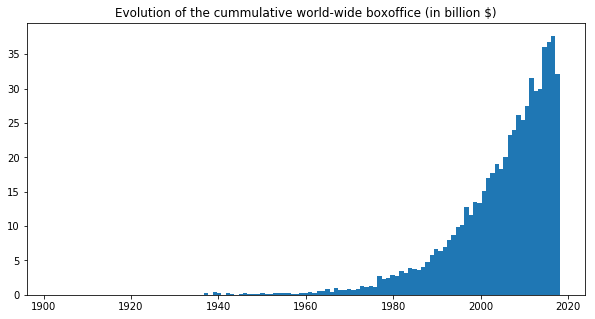

In [6]:
plt.figure(figsize=(10, 5))
plt.hist(years, weights=bo, bins=(years.max() - years.min()+1))
plt.title("Evolution of the cummulative world-wide boxoffice (in billion $)")
plt.savefig('docs/img/box_office.png', transparent=True)

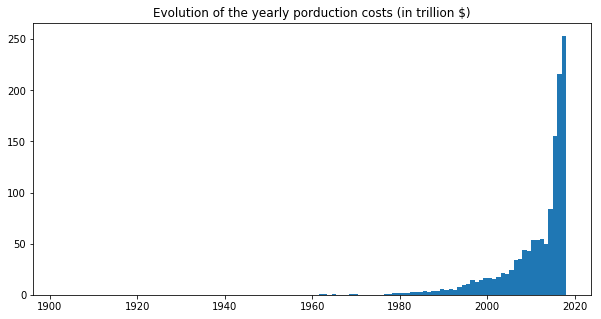

In [7]:
plt.figure(figsize=(10, 5))
plt.hist(years, weights=budget, bins=(years.max() - years.min()+1))
plt.title("Evolution of the yearly production costs (in trillion $)")
plt.savefig('docs/img/production_costs.png', transparent=True)

/Users/vincent/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Using Nominatim with the default "geopy/1.18.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  if __name__ == '__main__':


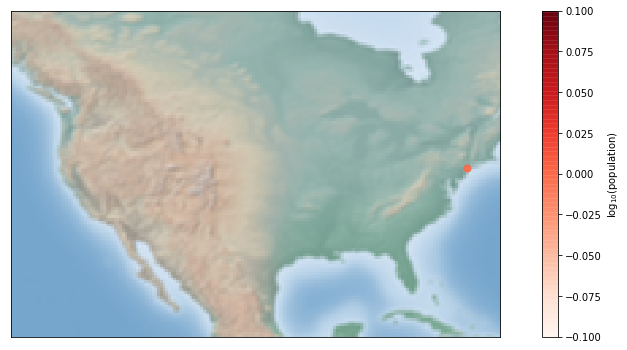

In [8]:
def draw_map(m, scale=0.1):
    # draw a shaded-relief image
    m.shadedrelief(scale=scale)
    
fig = plt.figure(figsize=(15, 6))
m = Basemap(projection='cyl', resolution='h', llcrnrlat=20, urcrnrlat=60, llcrnrlon=-130, urcrnrlon=-70)
#m = Basemap(projection='cyl', resolution='l', llcrnrlat=-90, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180)

geolocator = Nominatim()
location = geolocator.geocode("New York")
location.longitude, location.latitude

draw_map(m)
lon = [location.longitude]
lat = [location.latitude]
population = [1]
area = [1000]
m.scatter(lon, lat, latlon=True, c=np.log10(population), s=50, cmap='Reds', alpha=0.9)

# 3. create colorbar and legend
plt.colorbar(label=r'$\log_{10}({\rm population})$');

In [10]:
p = GeoText("London, New York, ")
p.cities

['London', 'New York']